## 2. Ortogonalūs krypčių laukai

Dviejų pirmos eilės diferencialinių lygčių su ortogonaliais krypčių laukais integralinių kreivių (ar bent pačių krypčių laukų) braižymas. Ortogonalūs krypčių laukai apibrėžti antros paskaitos 9-oje skaidrėje: uždavus vieną diferencialinę lygtį $\ y'=F(x,y),\ $ kitos diferencinės lygties $\ F(x,y)\,y'+1=0\ $ krypčių laukas bus ortogonalus (t.y., $90^o$ statmenas duotos lygties krypčių laukui) kiekviename taške.

Praktiškai tikimasi arba dviejų (statmenų) krypčių laukų braižymo vienoje $(x,y)$-srityje skirtingomis spalvomis, arba panašiai, dviejų integralinių kreivių šeimų braižymo vienoje $(x,y)$-srityje.

In [428]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sc
import inspect

np.seterr(divide="ignore")

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [429]:
def cauchy_problem(F, x0, y0, x, y_min, y_max):

    if(x0 < x[0] or x0 > x[-1]):
        raise Exception("Initial point must be within given x value range")

    N = x.size - 1 
    N0 = round(N * (x0 - x[0]) / (x[-1] - x[0]))

    #print("x size = ", x.size)
    #print("N0 = ", N0)
    #print("y_min = ", y_min, "y_max = ", y_max)

    x = x + (x0 - x[N0])

    # points that were calculated by numerically integrating 
    # in the positive direction of given x values from the initial point p
    positive_points = []
    
    for point in zip(x[N0:], sc.odeint(F, y0, x[N0:]).flatten()):

        positive_points.append(point)

        # if y values go beyond some point, stop plotting
        point_y = point[1]

        if(point_y < y_min or point_y > y_max or np.isnan(point_y)):
            break

    # points that were calculated by numerically integrating 
    # in the negative direction of given x values from the initial point p
    negative_points = []
    for point in list(zip(x[N0::-1], sc.odeint(F, y0, x[N0::-1]).flatten())):

        negative_points.append(point)

        # if y values go beyond some point, stop plotting
        point_y = point[1]
        
        if(point_y < y_min or point_y > y_max or np.isnan(point_y)):
            break

    negative_points.reverse()
    zipped = negative_points + positive_points
    unzipped = list(zip(*zipped))

    #print("result = ", unzipped)

    xs, ys = unzipped

    return (xs, ys)

In [430]:
def visualize(F, bounds = [(-1,1), (-1,1)], slope_field_samples=30, sol_samples=100, p = (-0.5,-0.5)):
    X = np.linspace(bounds[0][0], bounds[0][1], samples)
    Y = np.linspace(bounds[1][0], bounds[1][1], samples)

    XS, YS = np.meshgrid(X, Y);

    FY = F(XS, YS)
    
    FX = 1 / np.sqrt(1 + FY**2)
    FY = FX * FY

    XP = np.linspace(bounds[0][0], bounds[0][1], 3 * samples)
    p1 = cauchy_problem(lambda y, x: F(x, y), *p, XP, bounds[1][0], bounds[1][1])

    XP = np.linspace(bounds[0][0], bounds[0][1], 3 * samples)
    p2 = cauchy_problem(lambda y, x: -1/F(x, y), *p, XP, bounds[1][0], bounds[1][1])

    plt.figure(figsize = (6,6))
    
    plt.quiver(XS, YS, FX, FY, color="red", pivot="mid", headaxislength=0, headwidth=0, headlength=0);
    plt.quiver(XS, YS, -FY, FX, color="blue", pivot="mid", headaxislength=0, headwidth=0, headlength=0);

    plt.plot(*p1, color="red")

    # visualizing solution of orthogonal direction field is not visually appealing
    plt.plot(*p2, color="blue")

    margin = 0.1
    plt.xlim([bounds[0][0] - margin, bounds[0][1] + margin])
    plt.ylim([bounds[1][0] - margin, bounds[1][1] + margin])

    plt.show()

c:\Users\Arnas\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


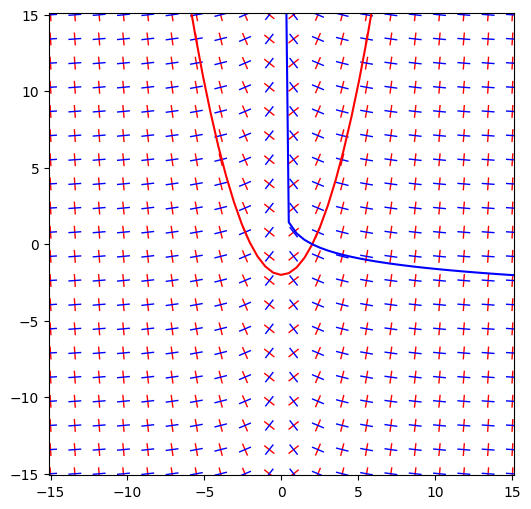

In [446]:
visualize(
    lambda x, y: x, # F(x, y) = x
    bounds = [(-15, 15), (-15,15)],
    p = (2,0))

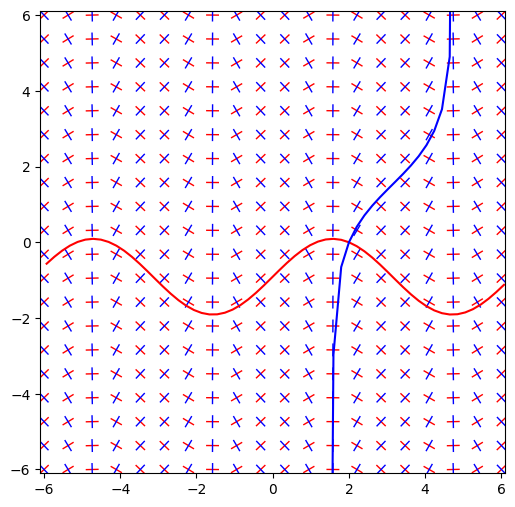

In [447]:
visualize(
    lambda x, y: np.cos(x), # F(x, y) = cos(x)
    bounds = [(-6, 6), (-6,6)],
    p = (2,0))

C:\Users\Arnas\AppData\Local\Temp\ipykernel_14080\3448194935.py:2: RuntimeWarning: invalid value encountered in sqrt
  lambda x, y: np.sqrt(1 - x**2 - y**2), # F(x, y) = cos(x)
c:\Users\Arnas\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


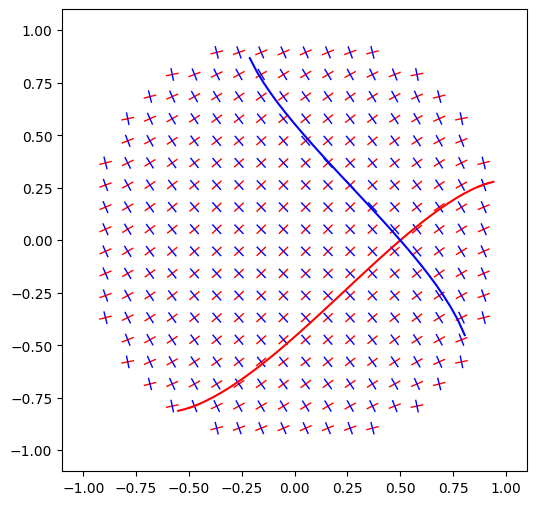

In [448]:
visualize(
    lambda x, y: np.sqrt(1 - x**2 - y**2), # F(x, y) = cos(x)
    bounds = [(-1, 1), (-1,1)],
    p = (1/2,0))

c:\Users\Arnas\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


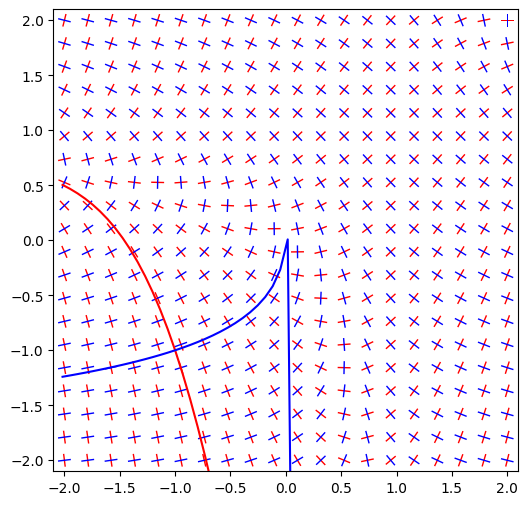

In [449]:
visualize(
    lambda x, y: x + y - x * y, # F(x, y) = ln(x + y)
    bounds = [(-2, 2), (-2, 2)],
    p = (-1,-1))